# Spectrum and mfcc tests

<a href="https://colab.research.google.com/github/inspektral/onset-benchmark/blob/main/spectrum-mfcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import synth
from IPython.display import Audio, display
import librosa

import utils

In [2]:
SAMPLE_RATE = 44100

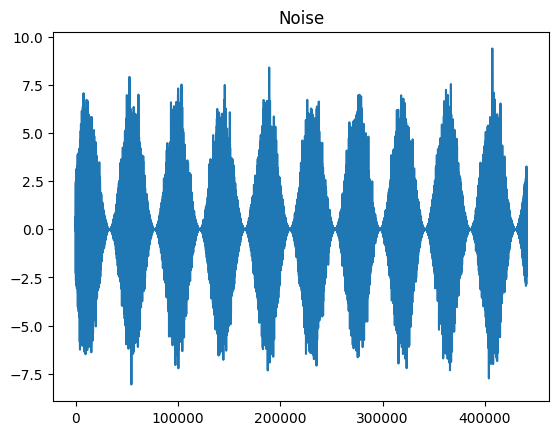

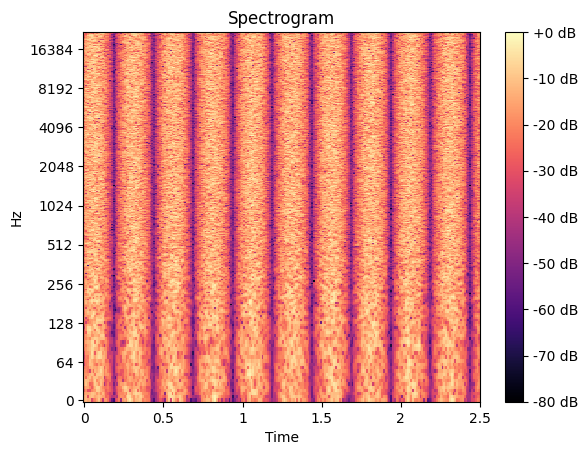

In [3]:
noise = synth.noise(amp=synth.sine_wave([1], [10])+1, duration=10)
plt.plot(noise)
plt.title("Noise")
plt.show()

display(Audio(noise, rate=SAMPLE_RATE))
utils.spectrogram(noise)


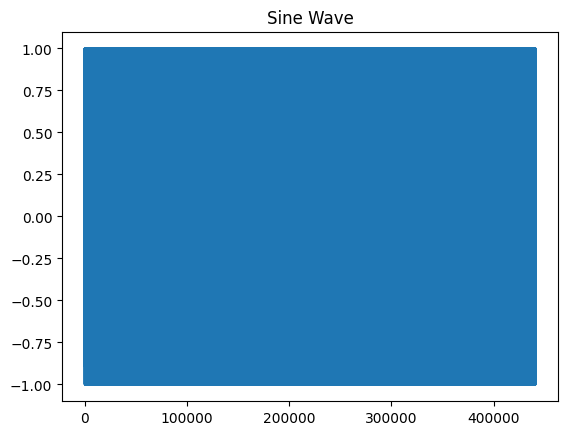

In [4]:
sine = synth.sine_wave([1], [440], duration=10)
plt.plot(sine)
plt.title("Sine Wave")
plt.show()

display(Audio(sine, rate=SAMPLE_RATE))


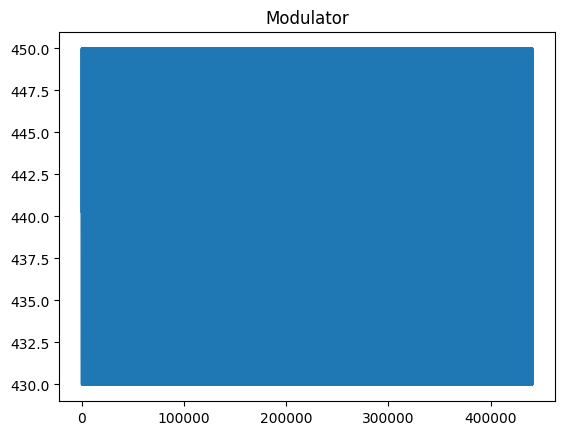

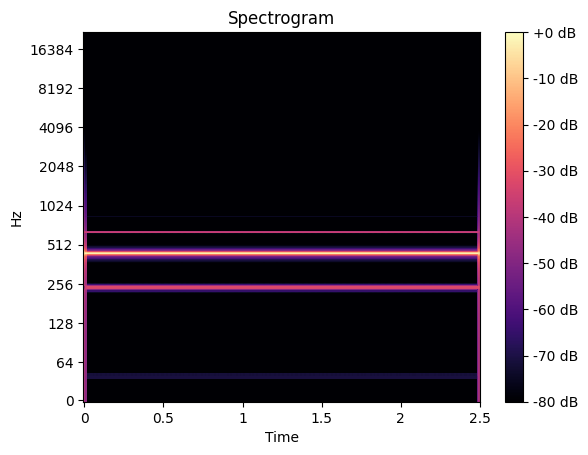

In [5]:
modulator = synth.sine_wave([1], [200])*10 + 440

fm_sine = synth.sine_wave([1], np.tile(modulator,10), duration=10)

plt.plot(np.tile(modulator,10))
plt.title("Modulator")
plt.show()

display(Audio(fm_sine, rate=SAMPLE_RATE))

utils.spectrogram(fm_sine)

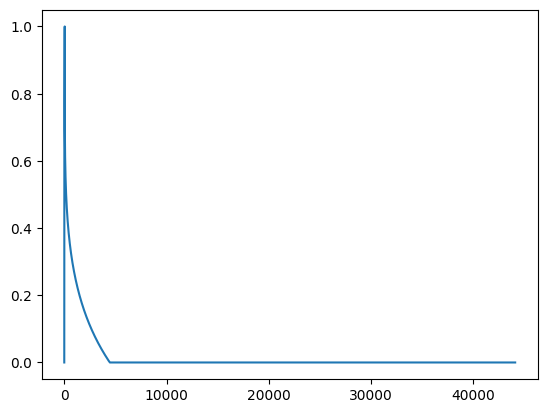

In [6]:
adsr = synth.adsr(0.001, 0.1, 0.0, 0.2, 0.2)

plt.plot(adsr)
plt.show()

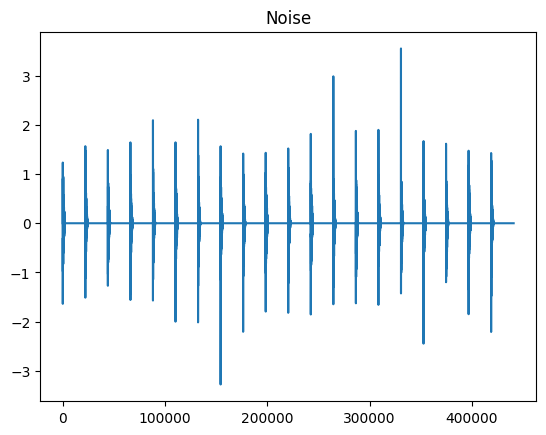

In [7]:
noise = synth.noise(amp=np.tile(adsr, 20), duration=10)
plt.plot(noise)
plt.title("Noise")
plt.show()

display(Audio(noise, rate=SAMPLE_RATE))


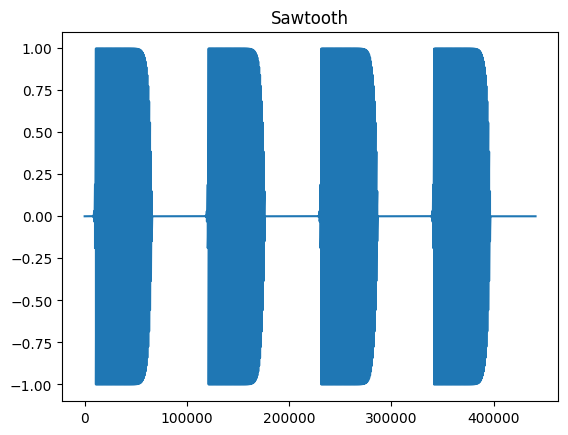

In [8]:
adsr = synth.adsr(0.1, 0.5, 0.0, 0.2, 20)
saw = synth.sawtooth_wave(np.tile(adsr, 4), [50], duration=10)

noise = synth.noise(duration=10)

audio = saw+noise

plt.plot(saw)
plt.title("Sawtooth")
plt.show()

display(Audio(saw, rate=SAMPLE_RATE))

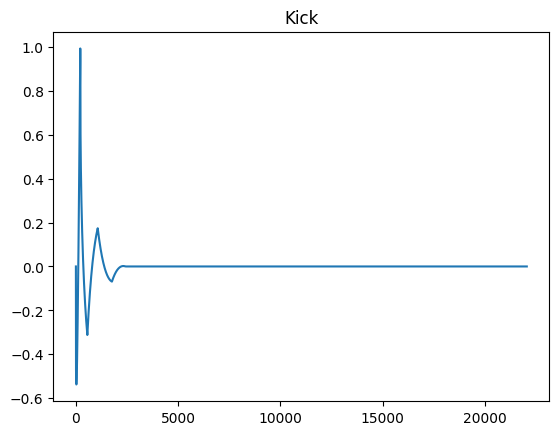

In [9]:
kick_adsr = synth.adsr(0.01, 0.1, 0.0, 0.2, 0.2)
kick = synth.triangle_wave(kick_adsr, kick_adsr*100+20, duration=0.5)

plt.plot(kick)
plt.title("Kick")

plt.show()

display(Audio(np.tile(kick,16), rate=SAMPLE_RATE))

In [10]:
random_sines = synth.sine_wave(np.random.rand(10), np.random.randint(100, 1000, 10), duration=10)
for i in range(10):
    random_sines = random_sines + synth.sine_wave(np.random.rand(10), np.random.randint(100, 1000, 10), duration=10)

sine = synth.sine_wave(np.tile(adsr, 4), [440], duration=10)

random_sines = random_sines + sine
random_sines = utils.norm(random_sines)

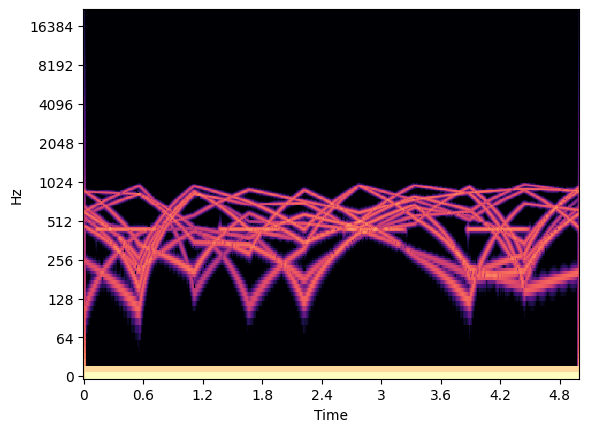

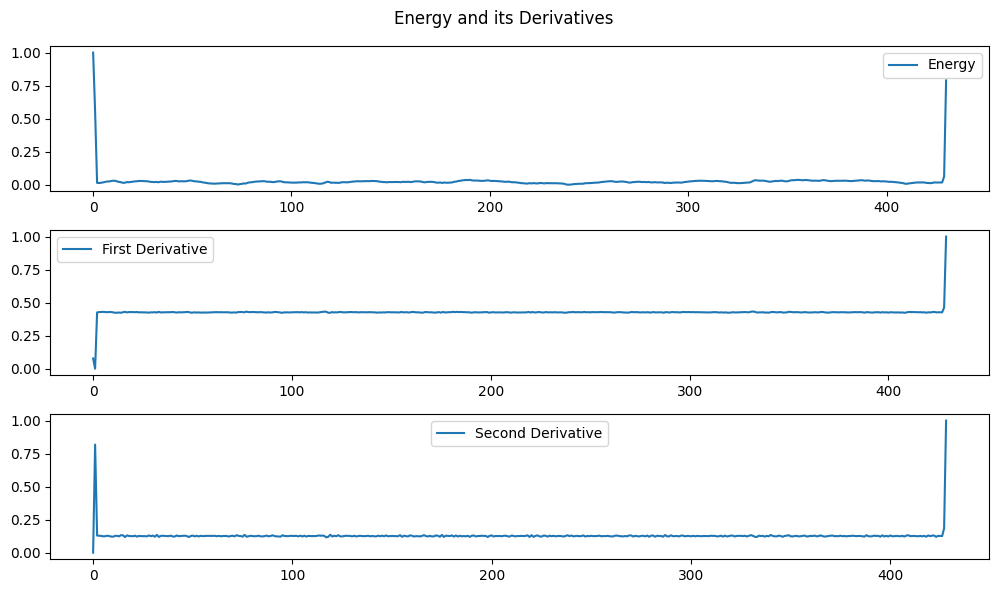

In [11]:
audio = noise
audio = saw+noise
audio = random_sines

spectrum = librosa.amplitude_to_db(np.abs(librosa.stft(audio, n_fft=4096)), ref=np.max)

display(Audio(utils.add_padding(audio), rate=SAMPLE_RATE))

librosa.display.specshow(spectrum, sr=SAMPLE_RATE, x_axis='time', y_axis='log')
plt.show()

energy = np.sum(spectrum, axis=0)
d_energy = np.diff(energy)
dd_energy = np.diff(d_energy)

plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot((energy-np.min(energy))/ np.max(energy-np.min(energy)), label='Energy')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot((d_energy-np.min(d_energy))/ np.max(d_energy-np.min(d_energy)), label='First Derivative')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot((dd_energy-np.min(dd_energy))/ np.max(dd_energy-np.min(dd_energy)), label='Second Derivative')
plt.legend()

plt.suptitle("Energy and its Derivatives")
plt.tight_layout()
plt.show()

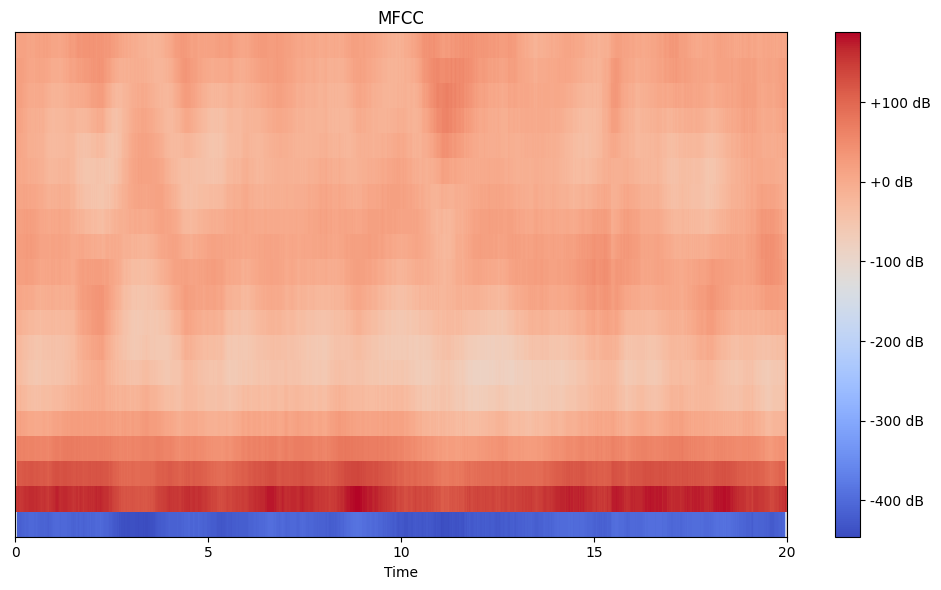

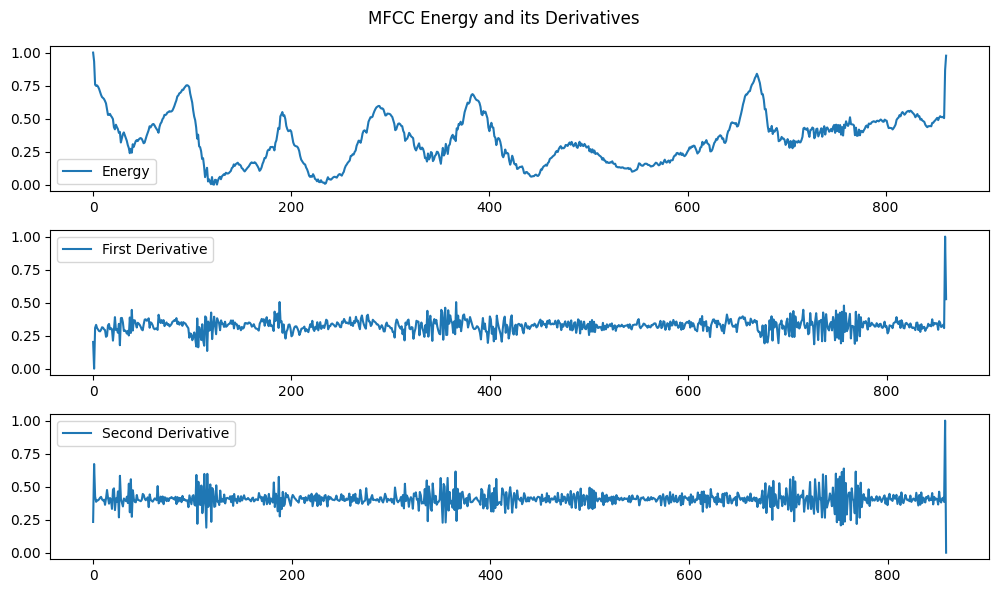

In [12]:
mfcc = librosa.feature.mfcc(y=audio, sr=SAMPLE_RATE)
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.tight_layout()
plt.show()

mfcc_sum = np.sum(mfcc, axis=0)
d_mfcc_sum = np.diff(mfcc_sum)
dd_mfcc_sum = np.diff(d_mfcc_sum)


plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot((mfcc_sum-np.min(mfcc_sum))/ np.max(mfcc_sum-np.min(mfcc_sum)), label='Energy')
plt.legend()
plt.subplot(3, 1, 2)

plt.plot((d_mfcc_sum-np.min(d_mfcc_sum))/ np.max(d_mfcc_sum-np.min(d_mfcc_sum)), label='First Derivative')
plt.legend()
plt.subplot(3, 1, 3)
plt.plot((dd_mfcc_sum-np.min(dd_mfcc_sum))/ np.max(dd_mfcc_sum-np.min(dd_mfcc_sum)), label='Second Derivative')
plt.legend()
plt.suptitle("MFCC Energy and its Derivatives")
plt.tight_layout()
plt.show()



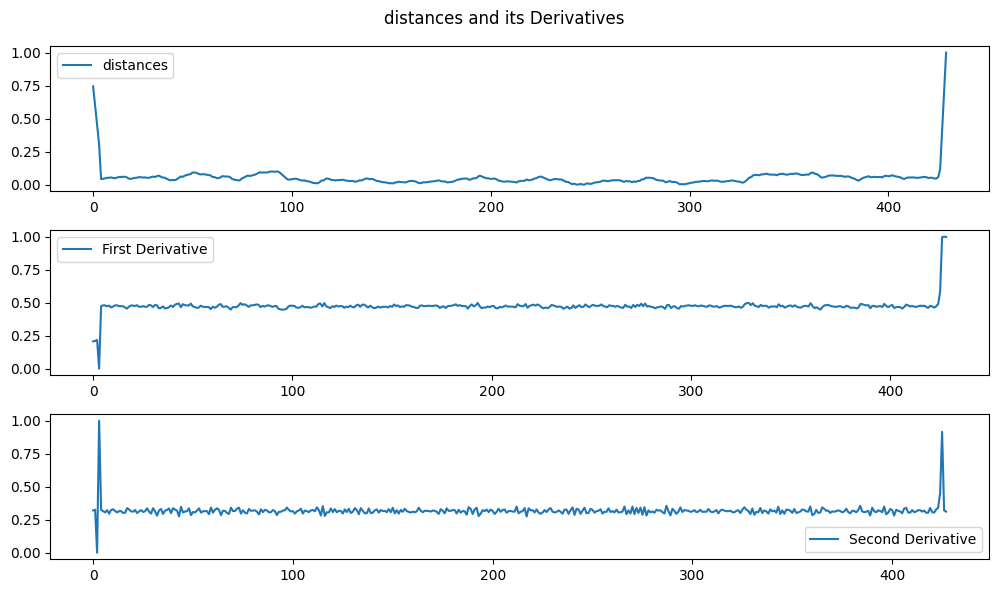

In [13]:
distances = utils.smoothing(utils.distances(spectrum))
d_distances = np.diff(distances)
dd_distances = np.diff(d_distances)

plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(utils.norm(distances), label='distances')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(utils.norm(d_distances), label='First Derivative')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(utils.norm(dd_distances), label='Second Derivative')
plt.legend()

plt.suptitle("distances and its Derivatives")
plt.tight_layout()
plt.show()

(20, 862)
(861,)
[[ -90.82695837 -154.14345008 -413.88533007 ... -407.87379998
  -209.4481588  -100.38665822]
 [ 140.34760207  146.77940116  154.50617934 ...  157.78811782
   167.11742168  143.19288832]
 [  26.80888308   31.54151119  115.98207207 ...  106.22193332
    45.25247318   28.97284556]
 ...
 [   7.20950143   10.42695695   20.86322109 ...   24.69655717
    15.65632795    8.12849473]
 [   5.734133      8.02923404   20.18611904 ...   23.01988383
    16.17881613   10.53782459]
 [   3.22867276    3.96453156   12.55929422 ...    9.93260467
    10.62483672    9.35207482]]


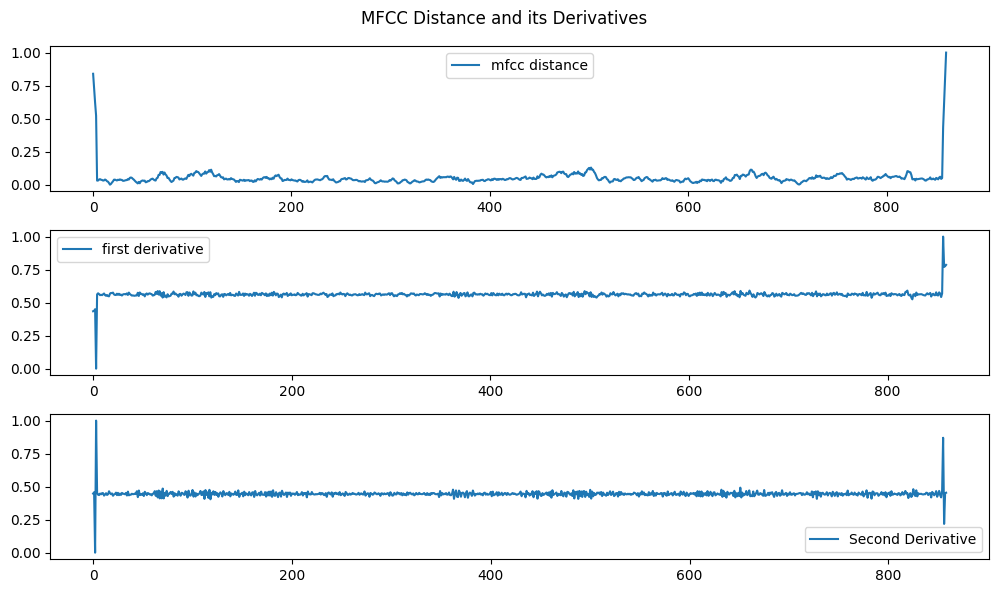

In [14]:
mfcc_distances = utils.smoothing(utils.distances(mfcc))
d_mfcc_distances = np.diff(mfcc_distances)
dd_mfcc_distances = np.diff(d_mfcc_distances)

print(mfcc.shape)
print(mfcc_distances.shape)
print(mfcc)


plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(utils.norm(mfcc_distances), label='mfcc distance')
plt.legend()
plt.subplot(3, 1, 2)

plt.plot(utils.norm(d_mfcc_distances), label="first derivative")
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(utils.norm(dd_mfcc_distances), label='Second Derivative')
plt.legend()
plt.suptitle("MFCC Distance and its Derivatives")
plt.tight_layout()
plt.show()

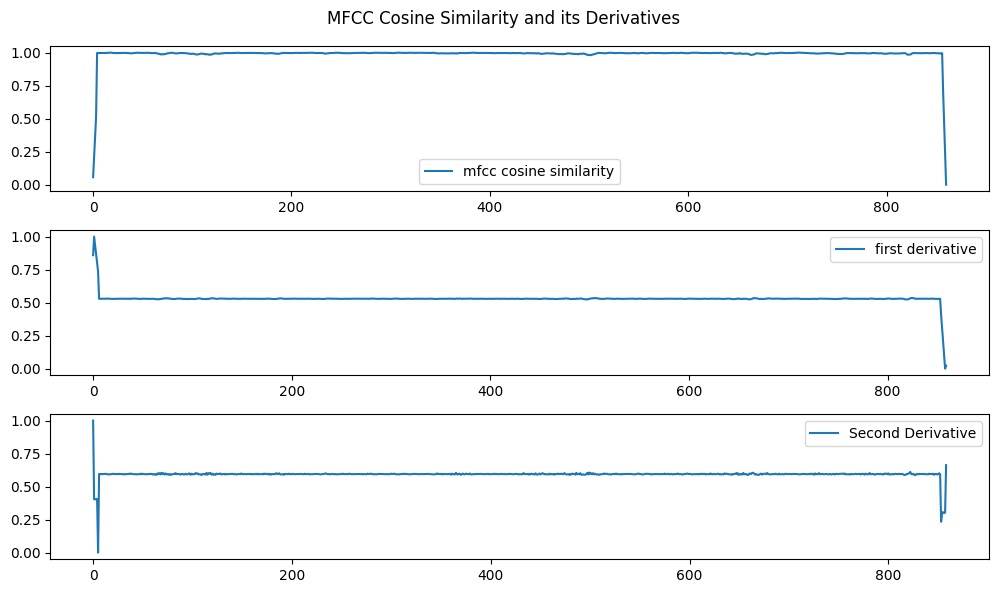

In [15]:
mfcc_cosine_similarity = utils.smoothing(utils.cosine_similarity(mfcc))
d_mfcc_cosine_similarity = utils.smoothing(np.diff(mfcc_cosine_similarity))
dd_mfcc_cosine_similarity = np.diff(d_mfcc_cosine_similarity)

plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(utils.norm(mfcc_cosine_similarity), label='mfcc cosine similarity')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(utils.norm(d_mfcc_cosine_similarity), label="first derivative")
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(utils.norm(dd_mfcc_cosine_similarity), label='Second Derivative')
plt.legend()
plt.suptitle("MFCC Cosine Similarity and its Derivatives")
plt.tight_layout()
plt.show()

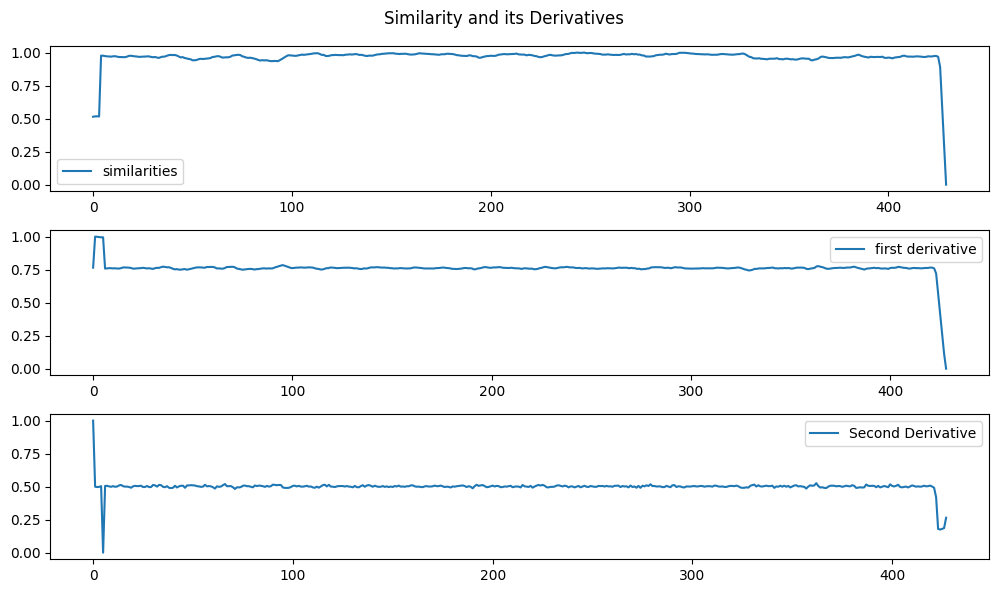

In [16]:
similarities = utils.smoothing(utils.cosine_similarity(spectrum))
d_similarities = utils.smoothing(np.diff(similarities))
dd_similarities = np.diff(d_similarities)
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(utils.norm(similarities), label='similarities')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(utils.norm(d_similarities), label="first derivative")
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(utils.norm(dd_similarities), label='Second Derivative')
plt.legend()
plt.suptitle("Similarity and its Derivatives")
plt.tight_layout()
plt.show()